In [169]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
core_commits = pd.read_csv('./core_commits.tsv', sep='\t', header=0, names=['count', 'date'])

In [87]:
parser_commits = pd.read_csv('./parser_commits.tsv', sep='\t', header=0, names=['count', 'date'])

In [170]:
def to_week_df(df):
    df.set_index(df['date'])
    df.index = pd.to_datetime(df['date'])
    reindexed = df.reindex(pd.date_range(df.index[0] - timedelta(days=7), df.index[-1] + timedelta(days=7)), fill_value=0)
    by_week_df = (
        reindexed
            .groupby(reindexed.index.strftime('%Y %W').map(lambda yw: dt.fromisocalendar(int(yw.split(' ')[0]), min(int(yw.split(' ')[1]) + 1, 52), 1)))
            ['count']
            .sum()
            .to_frame()
    )
    by_week_df.index = pd.to_datetime(by_week_df.index)
    by_week_df = by_week_df.sort_index()
    return by_week_df

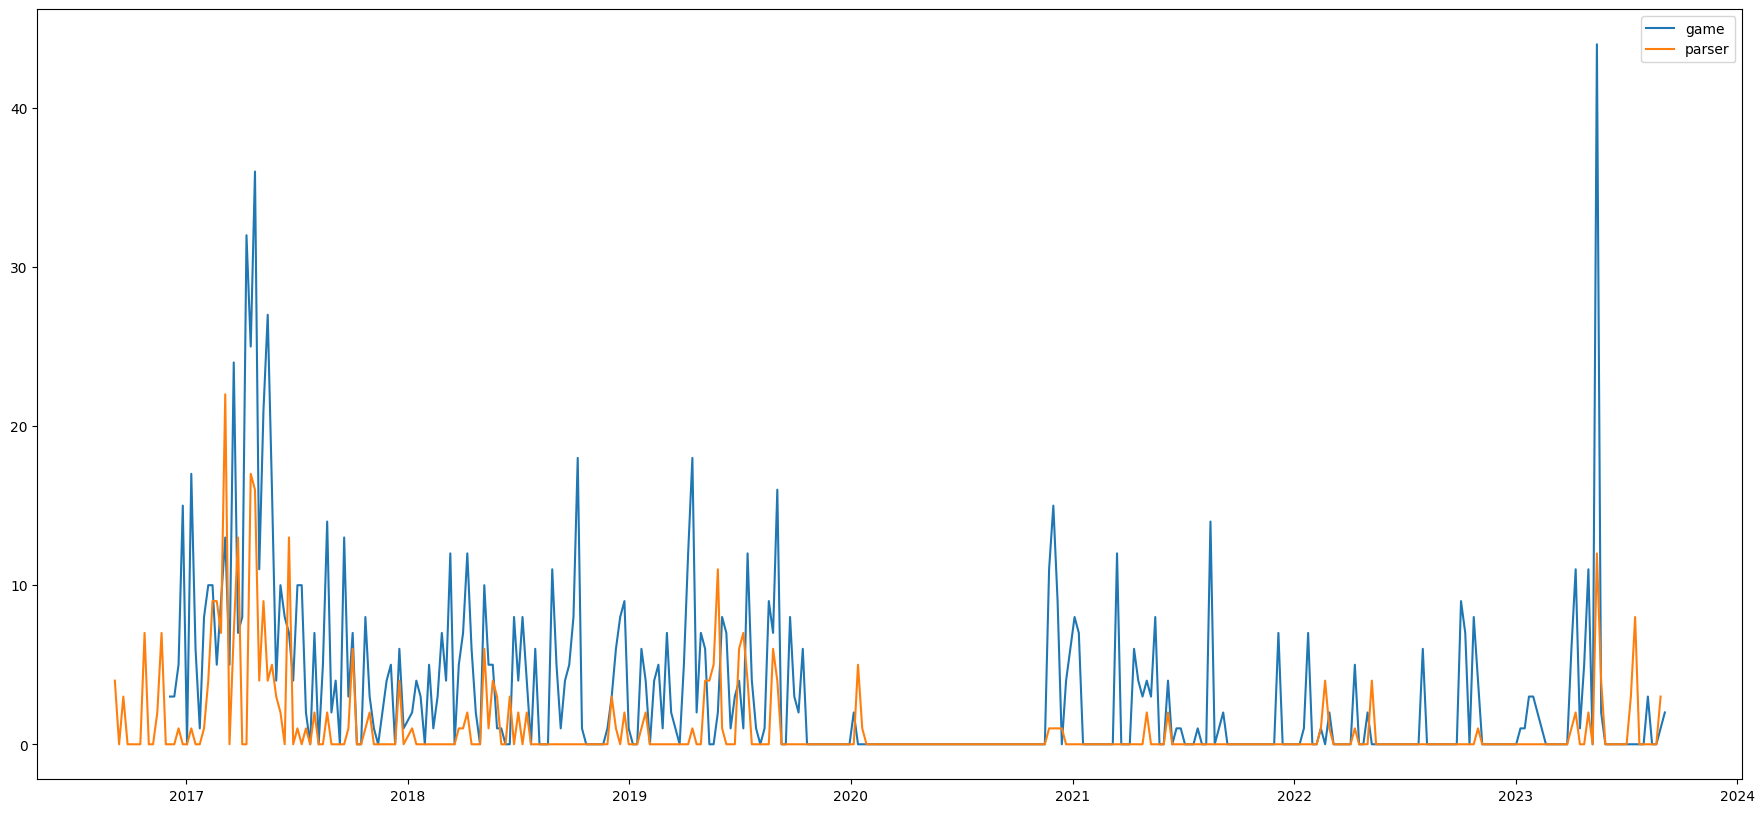

In [104]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.plot(to_week_df(core_commits), label="game")
ax.plot(to_week_df(parser_commits), label="parser")
_ = ax.legend()

In [188]:
RELEASES = {
    '0.1.0': '4/5/17',
    #'0.1.2': '4/6/17',
    #'0.1.3': '4/11/17',
    '0.2.0': '4/13/17',
    #'0.2.1': '4/16/17',
    '0.3.0': '4/17/17',
    #'0.3.2': '4/17/17',
    #'0.3.3': '4/18/17',
    '0.4.0': '4/24/17',
    '0.5.0': '5/1/17',
    #'0.5.1': '5/4/17',
    #'0.5.2': '5/5/17',
    #'0.5.3': '5/12/17',
    '0.5.4': '5/14/17',
    '0.6.0': '6/1/17',
    '0.6.1': '6/5/17',
    '0.6.2': '6/15/17',
    '0.7.0': '7/29/17',
    '0.7.1': '8/17/17',
    '0.8.0': '10/1/17',
    '0.8.1': '10/22/17',
    '0.8.2': '11/24/17',
    '0.8.3': '12/4/17',
    '0.8.4': '1/13/18',
    '0.9.0': '3/7/18',
    '0.9.1': '3/25/18',
    '0.9.2': '4/4/18',
    '0.9.3': '4/11/18',
    '0.10.0': '5/20/18',
    '0.11.0': '10/14/18',
    '0.11.1': '11/9/18',
    '0.12.0': '4/21/19',
    '0.12.1': '5/1/19',
    '0.13.0': '7/1/19',
    '0.13.1': '7/19/19',
    '0.14.0': '12/4/20',
    '0.14.1': '1/4/21',
    '0.15.0': '3/14/21',
    '0.16.0': '7/1/21',
    '0.16.1': '8/15/21',
    '0.17.0': '1/22/22',
    '0.18.0': '10/5/22',
    '0.19.0': '4/8/23',
    '0.20.0 (beta)': '4/29/23',
    '0.20.1': '5/14/23',
    '0.20.2': '5/21/23',
    '0.20.3': '8/21/23',
}

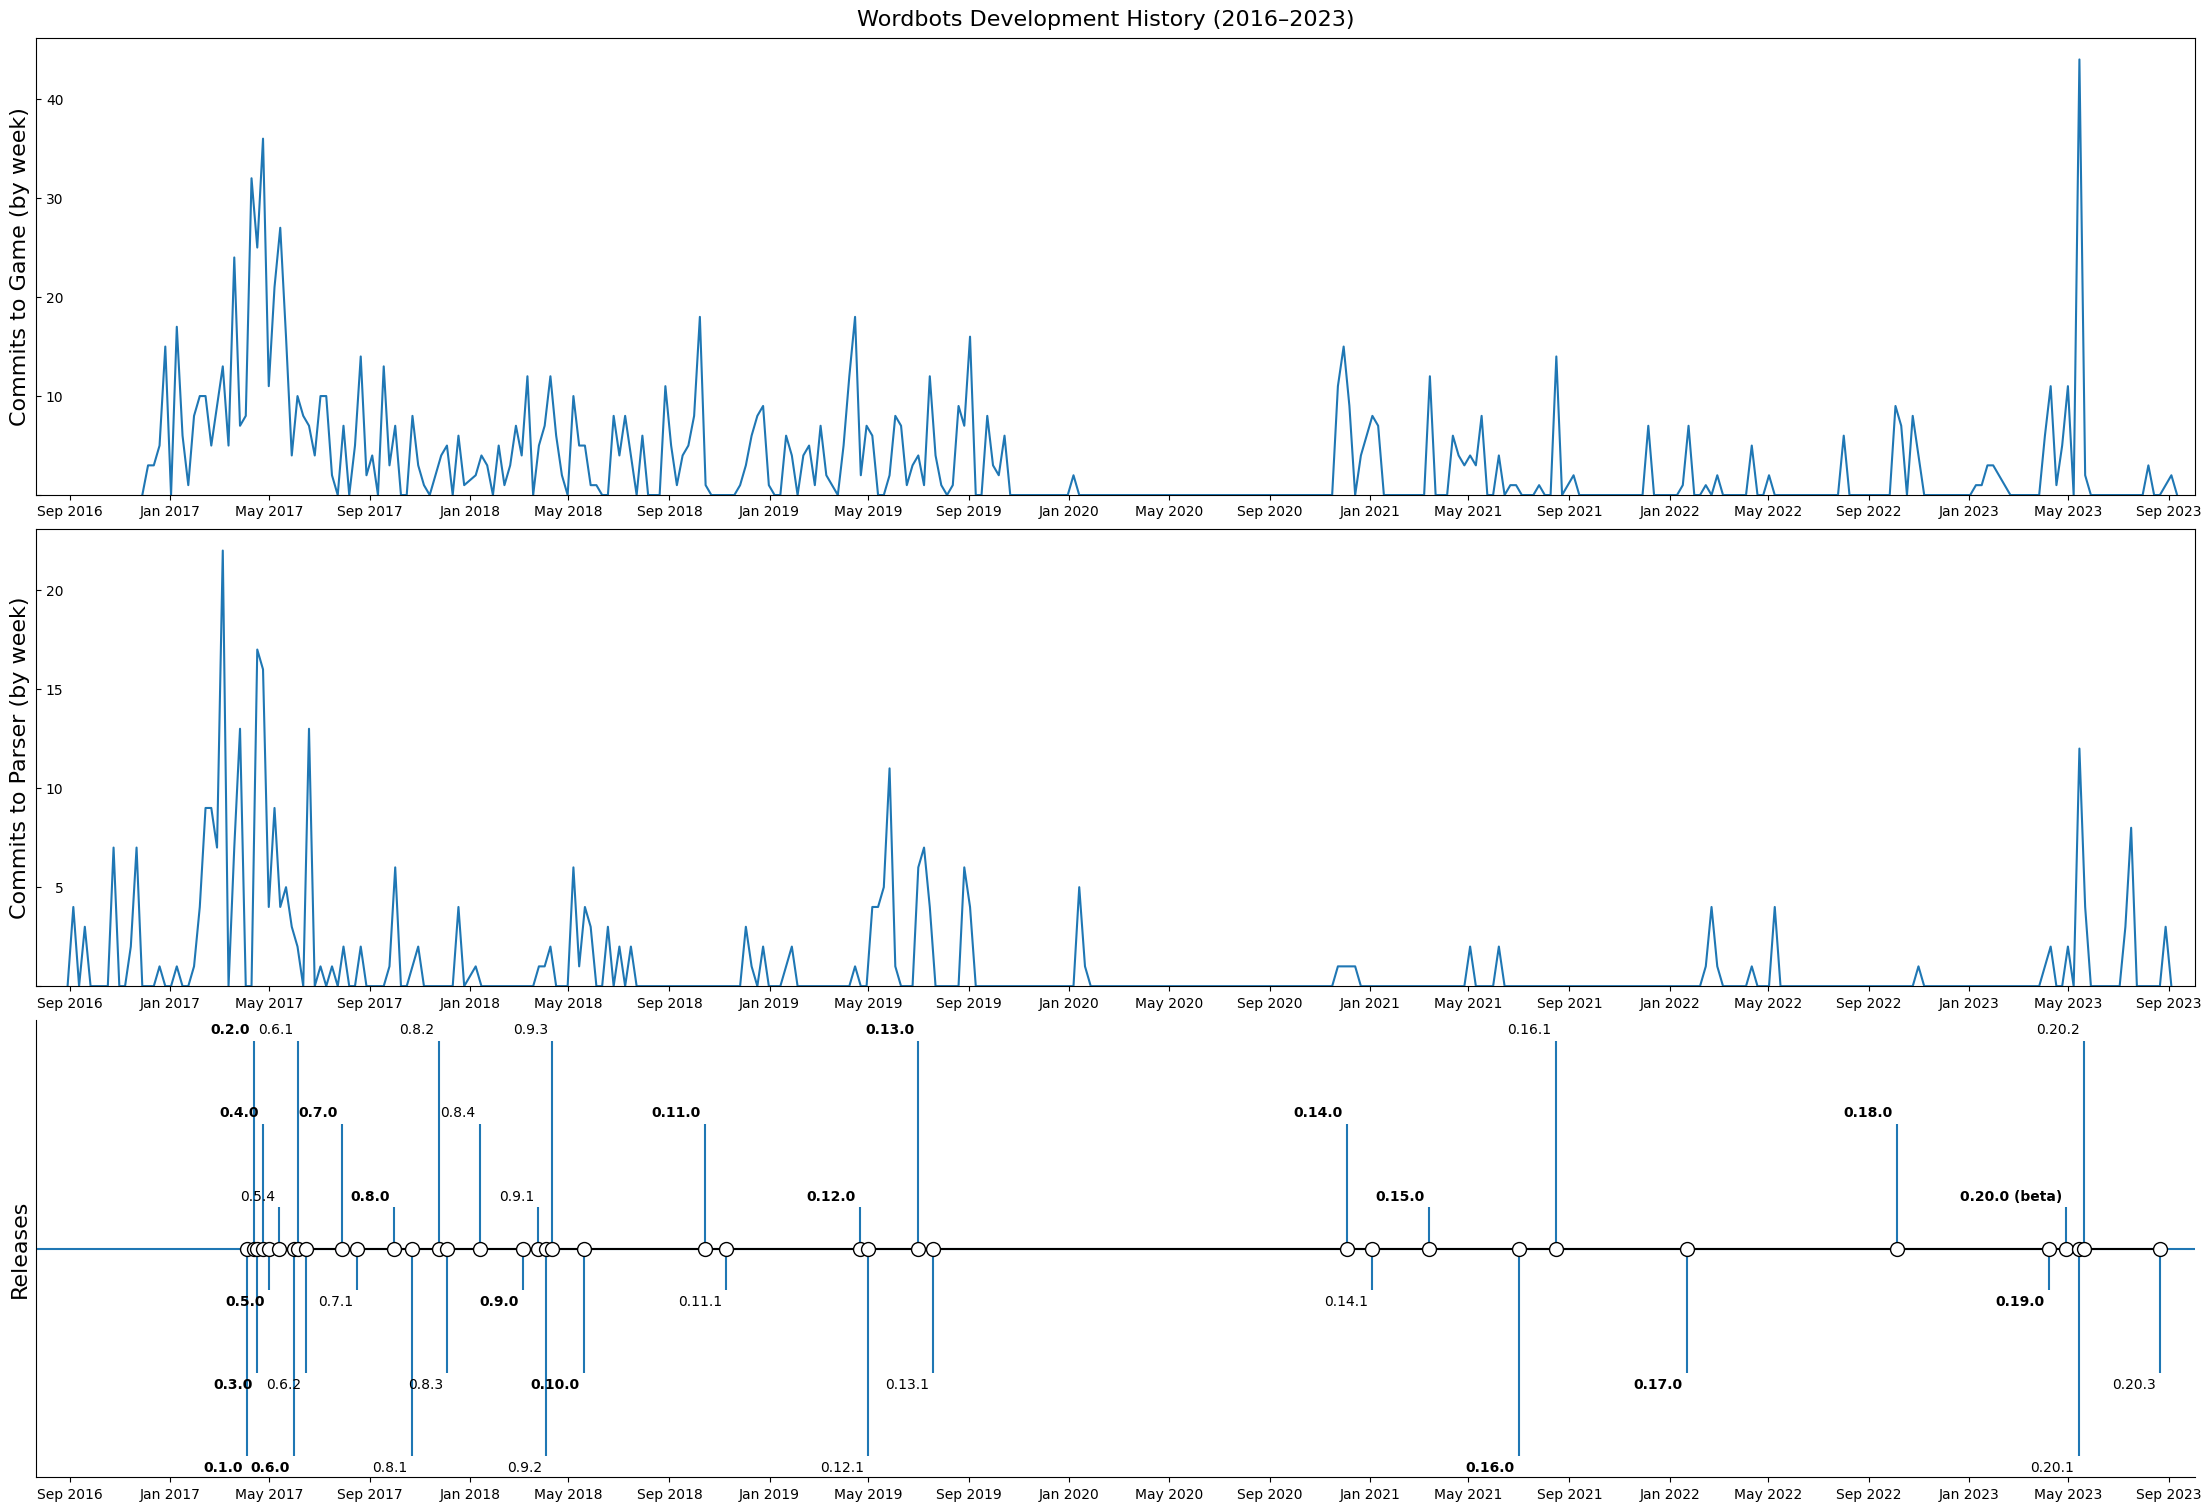

In [194]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(22, 15), layout='constrained', nrows=3, sharex=True)
fig.suptitle('Wordbots Development History (2016–2023)', fontsize=16)

ax1.plot(to_week_df(core_commits), label="game")
ax2.plot(to_week_df(parser_commits), label="parser")

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html

dates = RELEASES.values()
dates = [datetime.strptime(d, "%m/%d/%y") for d in dates]
names = RELEASES.keys()
levels = np.tile([-5, 5, -3, 3, -1, 1], int(np.ceil(len(dates)/6)))[:len(dates)]

ax3.axhline(y=0)
ax3.vlines(dates, 0, levels)  # The vertical stems.
ax3.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="w", markersize=10)  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax3.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top",
                fontweight='bold' if r.endswith('.0') or '(' in r else 'normal')

# format x-axis with 4-month intervals
ax1.set_xlim(xmin=parser_commits.index[0] - timedelta(days=45), xmax=core_commits.index[-1] + timedelta(days=30))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
# _ = plt.setp(ax3.get_xticklabels(), rotation=30, ha="right")

ax1.xaxis.set_tick_params(labelbottom=True)
ax2.xaxis.set_tick_params(labelbottom=True)

ax1.set_ylim(ymin=0)
ax2.set_ylim(ymin=0)

ax1.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax1.tick_params(axis="y",direction="in", pad=-20)

ax2.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax2.tick_params(axis="y",direction="in", pad=-20)

ax1.set_ylabel('Commits to Game (by week)', fontsize=16)
ax2.set_ylabel('Commits to Parser (by week)', fontsize=16)
ax3.set_ylabel('Releases', fontsize=16)
ax3.set_yticks([])
ax3.spines[["right", "top"]].set_visible(False)
_